In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import requests
from config import weather_api_key
from datetime import datetime

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
coordinates

[(-47.826835692368995, -72.77711562960648),
 (-87.50774212334723, -124.62069812222146),
 (1.7583830600484731, -163.04290557769377),
 (-71.9108713831931, -14.400142479123957),
 (14.44211826271237, -77.05734765405964),
 (84.90669525570902, -73.5982191289287),
 (26.334260594546294, -111.44237154135351),
 (-52.28467697252651, -105.15683799561343),
 (45.47749016150706, 51.525455809019434),
 (-56.1832159339745, -72.53730785713198),
 (78.76703300512818, 76.93974436623529),
 (9.409943548239909, -101.11518092758428),
 (-18.164698198579288, -40.254593790235816),
 (9.417435512146213, 7.13061860078929),
 (38.389750468494725, -170.5994378350286),
 (38.15175777423869, -4.199945106009466),
 (-64.70563816036145, 175.80521610611748),
 (15.797655991653869, -177.64715243789882),
 (-13.339530256107977, -29.480033735655525),
 (64.98363308544899, 11.297414584603558),
 (71.66624299939531, 38.70030572853034),
 (85.68839103056169, -176.96546319951997),
 (-26.362161133737317, -56.60025288964448),
 (18.909877427

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

639

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
# In the code block, we have initialized the counters at 1 because we want the first iteration of the logging for each recorded response and the set to start at 1.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | coihaique
Processing Record 2 of Set 1 | punta arenas
Processing Record 3 of Set 1 | lufilufi
Processing Record 4 of Set 1 | cape town
Processing Record 5 of Set 1 | bull savanna
Processing Record 6 of Set 1 | qaanaaq
Processing Record 7 of Set 1 | loreto
Processing Record 8 of Set 1 | castro
Processing Record 9 of Set 1 | shetpe
Processing Record 10 of Set 1 | dikson
Processing Record 11 of Set 1 | tecoanapa
Processing Record 12 of Set 1 | montanha
Processing Record 13 of Set 1 | suleja
Processing Record 14 of Set 1 | kapaa
Processing Record 15 of Set 1 | andujar
Processing Record 16 of Set 1 | kaitangata
Processing Record 17 of Set 1 | maragogi
Processing Record 18 of Set 1 | rorvik
Processing Record 19 of Set 1 | ostrovnoy
Processing Record 20 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 21 of Set 1 | yegros
Processing Record 22 of Set 1 | the valley
Processing Record 2

Processing Record 35 of Set 4 | mahibadhoo
Processing Record 36 of Set 4 | nelson bay
Processing Record 37 of Set 4 | clyde river
Processing Record 38 of Set 4 | aitape
Processing Record 39 of Set 4 | alice springs
Processing Record 40 of Set 4 | sorvag
City not found. Skipping...
Processing Record 41 of Set 4 | lagoa
Processing Record 42 of Set 4 | jacmel
Processing Record 43 of Set 4 | tasiilaq
Processing Record 44 of Set 4 | verkh-usugli
Processing Record 45 of Set 4 | gorontalo
Processing Record 46 of Set 4 | medina
Processing Record 47 of Set 4 | neuquen
Processing Record 48 of Set 4 | smolenka
Processing Record 49 of Set 4 | kununurra
Processing Record 50 of Set 4 | halkirk
Processing Record 1 of Set 5 | amderma
City not found. Skipping...
Processing Record 2 of Set 5 | killybegs
Processing Record 3 of Set 5 | yarim
Processing Record 4 of Set 5 | brewster
Processing Record 5 of Set 5 | praia da vitoria
Processing Record 6 of Set 5 | victoria
Processing Record 7 of Set 5 | rio gra

Processing Record 27 of Set 8 | banjar
Processing Record 28 of Set 8 | labelle
Processing Record 29 of Set 8 | laela
Processing Record 30 of Set 8 | sirjan
Processing Record 31 of Set 8 | kanniyakumari
Processing Record 32 of Set 8 | gwadar
Processing Record 33 of Set 8 | aktash
Processing Record 34 of Set 8 | barranca
Processing Record 35 of Set 8 | souillac
Processing Record 36 of Set 8 | bantou
Processing Record 37 of Set 8 | byron bay
Processing Record 38 of Set 8 | abalak
Processing Record 39 of Set 8 | ulaangom
Processing Record 40 of Set 8 | erenhot
Processing Record 41 of Set 8 | santa eulalia del rio
City not found. Skipping...
Processing Record 42 of Set 8 | nicoya
Processing Record 43 of Set 8 | spiez
Processing Record 44 of Set 8 | kohima
Processing Record 45 of Set 8 | hofn
Processing Record 46 of Set 8 | pandanon
City not found. Skipping...
Processing Record 47 of Set 8 | pozo colorado
Processing Record 48 of Set 8 | raudeberg
Processing Record 49 of Set 8 | katherine
Pro

Processing Record 16 of Set 12 | tinskoy
Processing Record 17 of Set 12 | baykit
Processing Record 18 of Set 12 | nemuro
Processing Record 19 of Set 12 | sarangani
Processing Record 20 of Set 12 | ballina
Processing Record 21 of Set 12 | warqla
City not found. Skipping...
Processing Record 22 of Set 12 | zhangye
Processing Record 23 of Set 12 | smithers
Processing Record 24 of Set 12 | bengkulu
Processing Record 25 of Set 12 | faya
Processing Record 26 of Set 12 | salinopolis
Processing Record 27 of Set 12 | sisimiut
Processing Record 28 of Set 12 | talawdi
City not found. Skipping...
Processing Record 29 of Set 12 | qafsah
City not found. Skipping...
Processing Record 30 of Set 12 | kitakata
Processing Record 31 of Set 12 | coos bay
Processing Record 32 of Set 12 | konza
Processing Record 33 of Set 12 | kalmunai
Processing Record 34 of Set 12 | dicabisagan
Processing Record 35 of Set 12 | geresk
City not found. Skipping...
Processing Record 36 of Set 12 | warrensburg
Processing Record

In [9]:
len(city_data)

588

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Coihaique,-45.58,-72.07,42.80,83,92,3.36,CL,2020-08-19 23:07:46
1,Punta Arenas,-53.15,-70.92,46.40,70,75,34.45,CL,2020-08-19 23:07:47
2,Lufilufi,-13.87,-171.60,87.80,66,75,14.99,WS,2020-08-19 23:07:47
3,Cape Town,-33.93,18.42,54.00,87,75,5.82,ZA,2020-08-19 23:07:47
4,Bull Savanna,17.89,-77.59,81.68,77,93,1.77,JM,2020-08-19 23:07:48
5,Qaanaaq,77.48,-69.36,44.38,90,100,1.79,GL,2020-08-19 23:07:48
6,Loreto,22.27,-101.97,73.81,44,100,7.56,MX,2020-08-19 23:07:48
7,Castro,-24.79,-50.01,52.18,96,100,1.81,BR,2020-08-19 23:07:48
8,Shetpe,44.17,52.12,70.54,39,0,8.61,KZ,2020-08-19 23:07:49
9,Dikson,73.51,80.55,47.84,77,0,13.96,RU,2020-08-19 23:04:45


In [13]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
reordered_city_df = city_data_df[new_column_order]
reordered_city_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Coihaique,CL,2020-08-19 23:07:46,-45.58,-72.07,42.80,83,92,3.36
1,Punta Arenas,CL,2020-08-19 23:07:47,-53.15,-70.92,46.40,70,75,34.45
2,Lufilufi,WS,2020-08-19 23:07:47,-13.87,-171.60,87.80,66,75,14.99
3,Cape Town,ZA,2020-08-19 23:07:47,-33.93,18.42,54.00,87,75,5.82
4,Bull Savanna,JM,2020-08-19 23:07:48,17.89,-77.59,81.68,77,93,1.77
...,...,...,...,...,...,...,...,...,...
583,Bauchi,NG,2020-08-19 23:10:24,10.50,10.00,74.16,86,95,6.20
584,Maceio,BR,2020-08-19 23:10:24,-9.67,-35.74,71.60,94,20,3.36
585,Toora-Khem,RU,2020-08-19 23:10:24,52.47,96.11,45.95,91,0,1.07
586,Sanary-Sur-Mer,FR,2020-08-19 23:10:25,43.12,5.80,75.00,68,0,1.01


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [17]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")
today

'08/19/20'

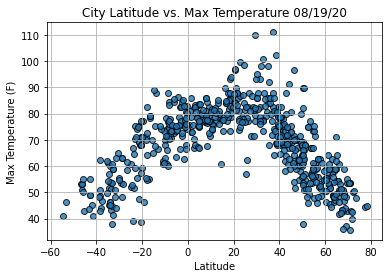

In [21]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

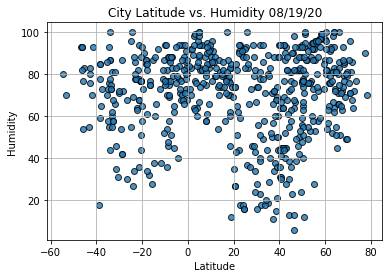

In [22]:
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

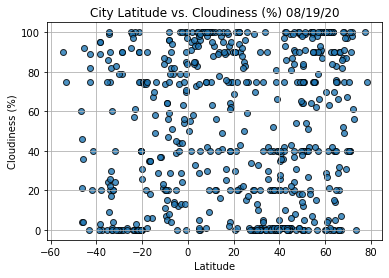

In [23]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

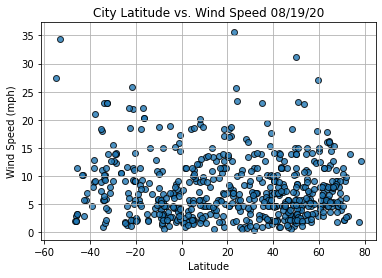

In [24]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()